




**Cencus data**
4640 unique tract id

**The first test found that a tract was eligible to gentrify if it met the following criteria:**

- The tract had a population of at least 500 residents at the beginning and end of a decade and was located within a central -city. 
- The tract’s median household income was in the bottom 40th percentile when compared to all tracts within its metro area at the beginning of the decade.
- The tract’s median home value was in the bottom 40th percentile when compared to all tracts within its metro area at the beginning of the decade.

**For a second test,** gentrification-eligible tracts were determined to have gentrified over a time period if they met the following criteria:

- An increase in a tract's educational attainment, as measured by the percentage of residents age 25 and over holding bachelor’s degrees, was in the top third percentile of all tracts within a metro area.
- A tract’s median home value increased when adjusted for inflation.
- The percentage increase in a tract’s inflation-adjusted median home value was in the top third percentile of all tracts within a metro area.


https://api.census.gov/data/2018/acs/acs5/profile/variables.html
Census tracts with missing data for any one of these measures were excluded and considered not eligible to gentrify.
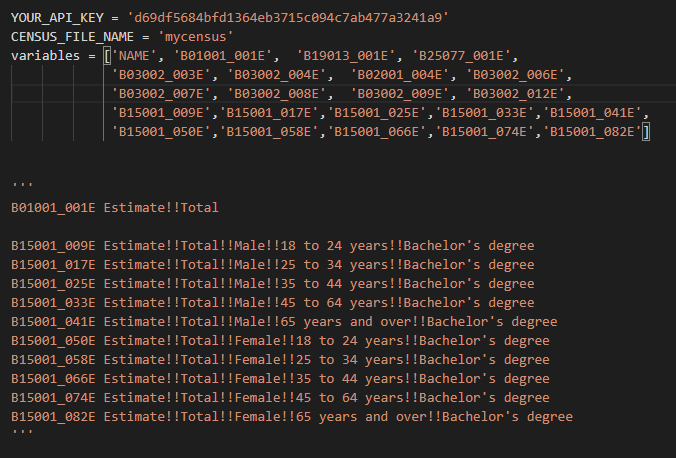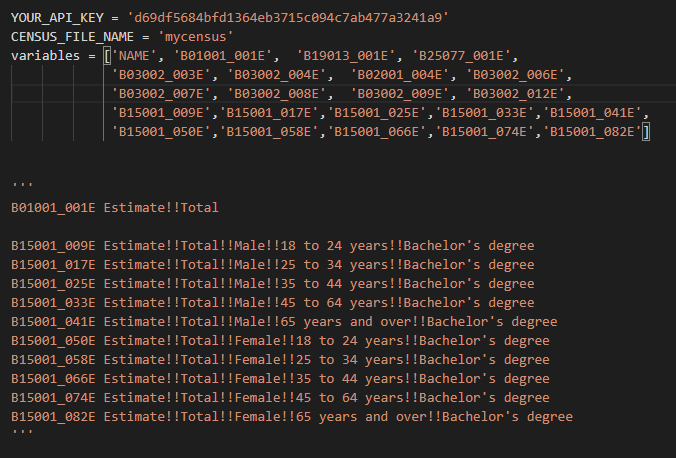

# processing mycensus_all.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# geoid is unique tract number is not 
all_geoid = []
all_data = []
for year in range(2009,2019):
    data1 = pd.read_csv('./raw_data/mycensus_{}.csv'.format(year)).rename(columns={
        'B01001_001E':'Population',
        'B19013_001E':'MedianIncome',
        'B25077_001E':'MedianHomeValue',
        'B03002_003E':'No_NHCau',
        'B03002_004E':'No_NHBlk',
        'B02001_004E':'No_NHInd',
        'B03002_006E':'No_NHAsn',
        'B03002_007E':'No_NHHaw',
        'B03002_008E':'No_NHOth',
        'B03002_009E':'No_NHMul',
        'B03002_012E':'No_His'
    })
    all_seg = ['B15001_009E','B15001_017E','B15001_025E','B15001_033E','B15001_041E','B15001_050E','B15001_058E','B15001_066E','B15001_074E','B15001_082E']
    all_seg25 = ['B15001_017E','B15001_025E','B15001_033E','B15001_041E','B15001_058E','B15001_066E','B15001_074E','B15001_082E']
    data1.loc[:,'BachelarPerc'] = data1.loc[:,all_seg25].sum(axis=1)/data1.loc[:,'Population']
    data1 = data1.drop(columns=all_seg)
    data1 = data1.dropna()
    all_data.append(data1)
    all_geoid.append(list(data1.geoid))
interested_geoid = list(set.intersection(*map(set, all_geoid)))
final_df = pd.concat([df[df['geoid'].isin(interested_geoid)] for df in all_data])
final_df.to_csv('mycensus_all.csv')

In [7]:
interested_geoid = pd.read_csv('mycensus_all.csv').geoid.unique()
print('number of tracts that has all continuous data are ' + str(len(interested_geoid)))

number of tracts that has all continuous data are 3867


# processing 311CallALL

In [8]:
tract_converter = pd.read_csv('census_block_loc.csv')
tract_converter.BlockCode = tract_converter.BlockCode.apply(lambda x: int(str(x)[:-4]))
tract_converter = tract_converter.groupby('BlockCode').mean()
indexes = tract_converter.index
all_locations = list(zip(tract_converter.Latitude,tract_converter.Longitude))
tract_converter = {i:indexes[n] for n,i in enumerate(all_locations)}
tract_converter_flip = {indexes[n]:i for n,i in enumerate(all_locations)}
tract_converter

{(40.92481554111953, -73.92619928912679): 34003002100,
 (40.927533120145455, -73.98672910002728): 34003003100,
 (40.92307474874374, -73.996460427125): 34003003200,
 (40.92653266331999, -74.00541708543332): 34003003300,
 (40.91869346733636, -74.01176793058181): 34003003401,
 (40.915018844212504, -74.00576005025624): 34003003402,
 (40.917871174050006, -73.98859981725): 34003003500,
 (40.87920757633076, -74.0289253962): 34003004001,
 (40.87195979900001, -74.02937185928333): 34003004002,
 (40.82496434267248, -74.06153883188507): 34003005000,
 (40.82849246231112, -73.98839195977776): 34003006100,
 (40.82168341709001, -73.98652763817): 34003006201,
 (40.82711055276666, -73.98082914575001): 34003006202,
 (40.813919597991664, -73.99085427134166): 34003006300,
 (40.9290954774, -73.94378894473999): 34003008000,
 (40.91762232213685, -74.12087542978945): 34003011100,
 (40.910600370268426, -74.12704046550526): 34003011200,
 (40.896532663305706, -74.12342713569143): 34003011300,
 (40.90265874827879,

In [13]:
latmin = min([i[0] for i in all_locations])
lonmin = min([i[1] for i in all_locations])
latmax = max([i[0] for i in all_locations])
lonmax = max([i[1] for i in all_locations])
columns_to_drop = ['Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1','Intersection Street 2','Resolution Description','Community Board','BBL']



In [2]:
import pandas as pd
pd.read_csv('census_block_loc.csv')

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ
5,40.48,-74.264171,340230074021000,Middlesex,NJ
6,40.48,-74.261005,340230074021000,Middlesex,NJ
7,40.48,-74.257839,340230074021000,Middlesex,NJ
8,40.48,-74.254673,340230074025000,Middlesex,NJ
9,40.48,-74.251508,340230074025000,Middlesex,NJ


In [19]:
from numba import jit
@jit(nopython=True)
def find_closer(input_locations,all_locations):
    M = len(input_locations)
    N = len(all_locations)
    result = []
    for m in range(M):
        cord = input_locations[m]
        min_value = [np.Inf for i in range(5)]
        closer_x = [np.nan for i in range(5)]
        closer_y = [np.nan for i in range(5)]
        for n in range(N):
            current = (all_locations[n,0]- cord[0])**2 + (all_locations[n,1]-cord[1])**2
            for i in range(5):
                if current<=min_value[i]:
                    min_value = min_value[:i]+[current]+min_value[i+1:]
                    closer_x = closer_x[:i] + [all_locations[n,0]] + closer_x[i+1:]
                    closer_y = closer_y[:i] + [all_locations[n,1]] + closer_y[i+1:]
                    break
        result.append([[closer_x[j],closer_y[j]] for j in range(5)])
    return result

for i in range(2010,2019):
    print(i)
    data = pd.read_csv('./raw_data/{}.csv'.format(i))
    data = data.dropna(subset=['Location'])
    data = data.reset_index(drop=True)
    data = data.drop(columns_to_drop, axis=1)
    data = data.loc[(data.Latitude.between(latmin,latmax)) & (data.Longitude.between(lonmin,lonmax)),:]
    input_locations = [eval(i) for i in data.loc[:,'Location'].values]
    print('loaded')
    
    result = find_closer(np.array(input_locations),np.array(all_locations))
    result = [[tract_converter[tuple(j)] for j in i] for i in result]
    result = pd.DataFrame(result,columns = ['TractID','1stClose','2ndClose','3rdClose','4rdClose'])  
    data = pd.concat([data,result],axis=1)
    print('converting')
    data.loc[:,'Year'] = pd.to_datetime(data.loc[:,'Created Date']).dt.strftime('%Y')
    data.loc[:,'Month'] = pd.to_datetime(data.loc[:,'Created Date']).dt.strftime('%Y-%m')
    data.to_csv('clean_311Call_{}.csv'.format(i))

2010


C:\Users\richard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,17,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


loaded
converting
2011


C:\Users\richard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


loaded
converting
2012
loaded
converting
2013


C:\Users\richard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


loaded
converting
2014


C:\Users\richard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


loaded
converting
2015


C:\Users\richard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,17,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


loaded
converting
2016
loaded
converting
2017


C:\Users\richard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,17,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


loaded
converting
2018
loaded
converting


In [20]:
all_df = []
for i in range(2010,2019):
    print(i)
    data = pd.read_csv('clean_311Call_{}.csv'.format(i),index_col=0)
    all_df.append(data)
all_311_call = pd.concat(all_df)
all_311_call.to_hdf('311CallALL.h5',key='data',mode='w')

2010
2011


C:\Users\richard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2012
2013
2014
2015


C:\Users\richard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (12,23,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2016
2017


C:\Users\richard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (23,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2018


C:\Users\richard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (12,23,24,26,27,28,29,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\richard\Anaconda3\lib\site-packages\pandas\core\generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->['Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Status', 'Due Date', 'Resolution Action Updated Date', 'Borough', 'Open Data Channel Type', 'Park Facility Name', 'Park Borough', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Location',

# processing tracts shapefile

In [ ]:
import urllib.request    # for downloading data
import scipy.stats as stats

import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import contextily as ctx
import descartes
from shapely.geometry import Point, Polygon
from geopandas import GeoDataFrame, GeoSeries
def getXY(pt):
    return (pt.x, pt.y)


def find_closest_NoRepeat(input_locations,all_locations):
    M = len(input_locations)
    N = len(all_locations)
    result = []
    for m in range(M):
        cord = input_locations[m,:]
        min_value = np.Inf
        for n in range(N):
            current = (all_locations[n,0]- cord[0])**2 + (all_locations[n,1]-cord[1])**2
            if current<min_value and tuple(all_locations[n,:]) not in result:
                closest = tuple(all_locations[n,:])
                min_value = current
        result.append(closest)
    return result


tract_converter = pd.read_csv('census_block_loc.csv')
tract_converter.BlockCode = tract_converter.BlockCode.apply(lambda x: int(str(x)[:-4]))
tract_converter = tract_converter.groupby('BlockCode').mean()
indexes = tract_converter.index
tract_converter_df = tract_converter


df = GeoDataFrame.from_file('./2010 Census Tracts/geo_export_3657d8b2-80d7-43ad-8d3e-bd6b480965d3.shp')
centroidlist = list(map(getXY, df.centroid))
centroidlist_to_index = {i:n for n,i in enumerate(centroidlist)}
latmin = min([i[1] for i in centroidlist])
lonmin = min([i[0] for i in centroidlist])
latmax = max([i[1] for i in centroidlist])
lonmax = max([i[0] for i in centroidlist])
# remove tract outside my shapefile
tract_converter_df = tract_converter_df.loc[(tract_converter_df.Latitude.between(latmin,latmax)) & (tract_converter_df.Longitude.between(lonmin,lonmax)),:]

# create geoid for each file
all_locations = [(x, y) for x, y in zip(tract_converter_df.Longitude, tract_converter_df.Latitude)]
complain_number_to_tract = {i:tract_converter_df.index[n] for n,i in enumerate(all_locations)}
result = find_closest_NoRepeat(np.array(all_locations),np.array(centroidlist))
result = [centroidlist_to_index[tuple(i)] for i in result]


#save

df = GeoDataFrame.from_file('./2010 Census Tracts/geo_export_3657d8b2-80d7-43ad-8d3e-bd6b480965d3.shp')
df = df.loc[result,:]
df.loc[:,'geoid'] = tract_converter_df.index
df.to_file("./geoid_shape/geoid_toshape.shp")